<a href="https://colab.research.google.com/github/HarryGN/Heat-transfer-Lab-Code/blob/main/Lab2Curvefitting_Harry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is the code for the lumped capacity model curve-fitting for the heat coefficient for the block without insulation. tested h_ss is not the final value, I will perform h_ss by hand in the doc.
```



In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import pandas as pd
import math

In [3]:
data = pd.read_csv('/content/313Lab2.csv',encoding="ISO-8859-1")

print(data)

    Time [min]  Temp [_]
0          0.0      20.3
1          0.5      23.7
2          1.0      27.7
3          1.5      31.5
4          2.0      35.0
5          2.5      38.5
6          3.0      41.9
7          3.5      45.5
8          4.0      48.2
9          4.5      51.6
10         5.0      54.9
11         6.0      60.5
12         7.0      65.0
13         8.0      70.4
14         9.0      75.2
15        10.0      79.4
16        11.0      83.4
17        12.0      87.5
18        13.0      90.3
19        14.0      93.6
20        15.0      96.3
21        16.0      98.9
22        17.0     101.6
23        18.0     104.0
24        19.0     106.1
25        20.0     107.8
26        22.0     108.9
27        23.0     107.8
28        24.0     107.1
29        26.0     108.9


In [4]:
xdata = data[data.columns[0]] * 60
print(xdata)

0        0.0
1       30.0
2       60.0
3       90.0
4      120.0
5      150.0
6      180.0
7      210.0
8      240.0
9      270.0
10     300.0
11     360.0
12     420.0
13     480.0
14     540.0
15     600.0
16     660.0
17     720.0
18     780.0
19     840.0
20     900.0
21     960.0
22    1020.0
23    1080.0
24    1140.0
25    1200.0
26    1320.0
27    1380.0
28    1440.0
29    1560.0
Name: Time [min], dtype: float64


In [5]:
ydata = data[data.columns[1]]
print(ydata)

0      20.3
1      23.7
2      27.7
3      31.5
4      35.0
5      38.5
6      41.9
7      45.5
8      48.2
9      51.6
10     54.9
11     60.5
12     65.0
13     70.4
14     75.2
15     79.4
16     83.4
17     87.5
18     90.3
19     93.6
20     96.3
21     98.9
22    101.6
23    104.0
24    106.1
25    107.8
26    108.9
27    107.8
28    107.1
29    108.9
Name: Temp [_], dtype: float64


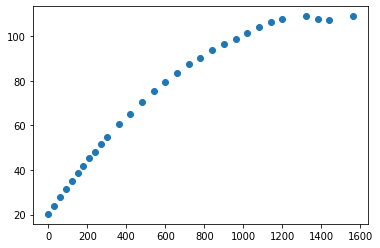

In [6]:
# Plot the data
plt.scatter(xdata, ydata, label='data')

In [7]:
##Debug Steps give all values
#surface area of the block
As = (2 * math.pow(0.04, 2))

#power generated V^2/R
P = math.pow(24, 2)/83.1

#volumn of the block
V = 0.04 * 0.04 * 0.01

#density of al
rho = 2700


#specific heat of al
Cp = 0.901 * 1000

print('As = ',As)
print('Power = ',P)

#coeficients 
print(P/(As))
print(-(As)/(rho*V*Cp))

As =  0.0032
Power =  6.931407942238268
2166.064981949459
-8.221317877255723e-05


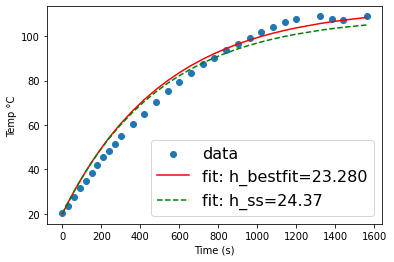

In [12]:
# Define the function
def func(t, h):
  #surface area of the block
  As = (2 * 0.04 ** 2) 

  #power generated V^2/R
  P = 24 ** 2/83.1

  #volumn of the block
  V = 0.04 * 0.04 * 0.01

  #density of al
  rho = 2700

  #specific heat of al
  Cp = 0.901 *1000
  return 20 + (P/(As*h))*(1-np.exp((-(As)/(rho*V*Cp))*h*t))


# xdata = np.linspace(0, 4, 50)
# y = func (xdata, 2.5, 1.3, 0.5)

# '''
# Generate some data by adding noise to the function output for the purpose of this example
# '''

# y_noise = 0.2 * np.random.normal (size=xdata.size)
# ydata = y + y_noise


# Plot the data
plt.scatter(xdata, ydata, label='data')


# Fit for the parameters h of the function func:
popt, pcov = curve_fit(func, xdata, ydata)

h = popt
plt.plot(xdata, func (xdata,*popt), 'r-',
         label='fit: h_bestfit=%5.3f' % tuple(popt))

# '''
# Constrain the fitting to the region of 0 <= h <= 50:
# '''

# popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, 50. ))
# popt

h_ss = 24.37
plt.plot(xdata, func (xdata, h_ss),'g--',
         label='fit: h_ss=24.37')

plt.xlabel('Time (s)')
plt.ylabel('Temp °C')
plt.legend(fontsize= 16)

In [ ]:
#convert to html
%%shell
jupyter nbconvert --to html /content/Lab2Curvefitting_Harry.ipynb